<h2>I am using the Chest-Xray image dataset from Kaggle that can be found here. https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia<br><br>
A quick summary of what the dataset is, would be that it contains a few thousand images of Chest Xrays, some of the images being normal and other images being people who have Pneumonia. The data are already split into training, test and validation sets for me. 
<br><br>
My goal is to see if I can learn enough about Neural Networks on my own to successfully complete and create a model that can Classify whether an image is a Normal X-ray or Pneumonia- X-ray
<br><br>
Throughout the code I added in these texts, I tried to avoid boring detail about the code itself and more about the reasons to do what I did with the Data.
<br><br>
Starting off, This code block just below here is me importing many full libraries as well as certain components of libraries that I had used in my final Convolutional Neural Network(CNN)</h2>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, SeparableConv2D
from tensorflow.keras.optimizers import SGD

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


#for dirname, _, filenames in os.walk('/kaggle/input/chest-xray-pneumonia/chest_xray/train'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

There is nothing to interesting about this codeblock I use it to read where the dataset is stored on the kaggle directory so that I can actually use the images in Data Exploration and CNN.


In [2]:
print(os.listdir("../input/chest-xray-pneumonia/chest_xray"))



['__MACOSX', 'chest_xray', 'val', 'test', 'train']


<h3 style="color:DodgerBlue;">This is a small block of code that will Read in an image maintaining it's default deimensions and color scale. When I was looking into image datasets to use I purposefully chose this dataset due to it being an X-ray image and Grayscale already, When working outside of grayscale there are 3 color palletes that you need to change and work with, which can cause extreme slowdowns.</h3>

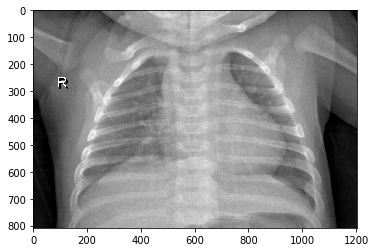

[[80 79 77 ... 18 14 10]
 [78 80 79 ... 19 17 14]
 [79 80 79 ... 19 18 14]
 ...
 [14 14 15 ... 15 14 14]
 [15 15 15 ... 14 15 15]
 [16 15 15 ... 13 13 13]]


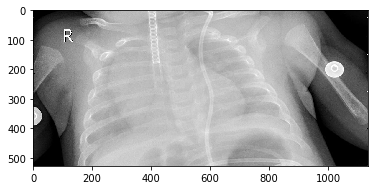

[[  0   0   0 ...  12  12  13]
 [  0   0   0 ...  11  11  12]
 [  0   0   0 ...  10  10  10]
 ...
 [255 230 255 ... 255 231 255]
 [  0  29   0 ...   0  30   0]
 [  1   0  12 ...  11   0   1]]


In [3]:
dirs = "../input/chest-xray-pneumonia/chest_xray/train"

categories = ["NORMAL", "PNEUMONIA"]

for category in categories:
    path = os.path.join(dirs, category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    
    print(img_array)

<h3 style="color:Tomato;">
Cool I can see an image, one without Pneumonia and one with pneumonia, I noticed immediately that  the images are not the same size and I think I can fix that by resizing each of them as they are read. Images being the same size is extremely important when it comes to the Convnet due to how each layer will parse over an image, having set uniform dimensions for the images means that one approach to reviewing "some" data will apply to all types of that data.</h3>
 
<h3 style="color:Tomato;">
In the code block below I am using the same code above, but adding in a resize call for every image and setting them to be 300x300. The reasoning for 300x300 is more about computational limitations than anything, Kaggle grants me limited RAM Usage and if I go above the allocated amount the Notebook resets itself, which sucks.<h3>

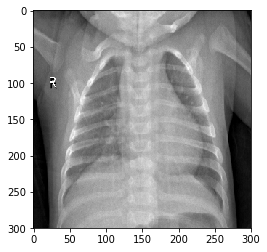

[[80 79 77 ... 18 14 10]
 [78 80 79 ... 19 17 14]
 [79 80 79 ... 19 18 14]
 ...
 [14 14 15 ... 15 14 14]
 [15 15 15 ... 14 15 15]
 [16 15 15 ... 13 13 13]]


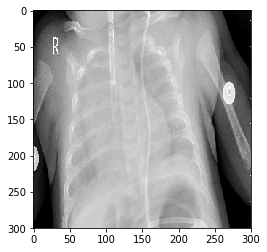

[[  0   0   0 ...  12  12  13]
 [  0   0   0 ...  11  11  12]
 [  0   0   0 ...  10  10  10]
 ...
 [255 230 255 ... 255 231 255]
 [  0  29   0 ...   0  30   0]
 [  1   0  12 ...  11   0   1]]


In [4]:
'''
Initial imageSize attempt was 800 * 800 sized images, but that was too much computation for this laptop.
in the kaggle notebook I can continue to use this!
'''
imageSize = 300

for category in categories:
    path = os.path.join(dirs, category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        plt.imshow(resized, cmap="gray")
        plt.show()
        break
    
    print(img_array)

<h3 style="color:Tomato;">Nice! Now they images will all be 300x300, I tried 800x800 erlier and ran into some serious slowdown when I tried to normalize the entire dataset (multiplying each index in the image arrays above by 1/255) Below each image is an Array this array has a number in it that denotes the color of that given pixel. Since our image is 300x300, each array contains 90,000 entries.</h3>

<h3 style="color:Tomato;">
The next couple of Blocks of code below is me fully going through the train, test and validation images making all of these changes and storing them in a list for me to work with more later. Doing this to all three datasets is the practical approach to maintaining validity of our data in a sense.</h3>

In [5]:
train = []

#My labels on the training data will be done with the indexing of our categories above 0=Normal, 1 = Pneumonia.

for category in categories:
    path = os.path.join(dirs, category)
    classification = categories.index(category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        train.append([resized, classification])
        
print("Printing first image as an array")
print(train[0])

print("Number of images in training set:", len(train))

Printing first image as an array
[array([[79, 76, 72, ..., 10, 14, 17],
       [79, 76, 72, ...,  7, 12, 15],
       [80, 78, 77, ...,  5,  9, 13],
       ...,
       [13, 15, 16, ..., 23, 22, 18],
       [12, 14, 14, ..., 23, 23, 16],
       [15, 13, 14, ..., 21, 21, 14]], dtype=uint8), 0]
Number of images in training set: 5216


<h3 style="color:Tomato;">


In [6]:
test = []
dirs = "../input/chest-xray-pneumonia/chest_xray/test"


for category in categories:
    path = os.path.join(dirs, category)
    classification = categories.index(category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        test.append([resized, classification])
print("Printing the first image as an array")  
print(test[0])
print("Number of images in our test set", len(test))

Printing the first image as an array
[array([[16, 17, 16, ..., 18, 21, 17],
       [14, 16, 16, ..., 21, 21, 22],
       [14, 16, 16, ..., 22, 20, 20],
       ...,
       [38, 37, 31, ..., 21, 23, 24],
       [40, 34, 32, ..., 27, 30, 28],
       [42, 36, 33, ..., 31, 33, 30]], dtype=uint8), 0]
Number of images in our test set 624


In [7]:
val = []
dirs = "../input/chest-xray-pneumonia/chest_xray/val"



for category in categories:
    path = os.path.join(dirs, category)
    classification = categories.index(category)
    for image in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,image),  cv2.IMREAD_GRAYSCALE)
        resized = cv2.resize(img_array, (imageSize, imageSize))
        val.append([resized, classification])
print("Printing first image as an array")    
print(val[0])
print("Number of images in validation set", len(val))

Printing first image as an array
[array([[ 20,  50,   1, ...,  15,  14,  15],
       [110,   0,   1, ...,  14,  15,  15],
       [ 77,   0,   1, ...,  15,  15,  15],
       ...,
       [ 42,  41,  33, ...,  29,  34,  30],
       [ 63,  44,  33, ...,  27,  27,  25],
       [ 41,  40,  35, ...,  26,  26,  26]], dtype=uint8), 0]
Number of images in validation set 16


<h4 style="color:DodgerBlue;">The way a for loop works is that it iterates from left to right or top to bottom in the case the file directory. This is awesome, but also a bit dangerous when fitting a model. The way the images are stored ALL of the negative cases (normal Xrays) are first and then the pneumonia cases come after.
<br><br>
Our training dataset has 5216 images, split 50/50 between normal and pneumonia cases, If the neural network is going through and finding interesting parts of an image the first 2600ish images will all be normal, greatly skewing the chance or reason to ever guess differently. <br><br>It would be like if a child learns addition only and is given a subtraction problem. They get it wrong and know it needs to be fixed, tweaking what they know to better learn subtraction is not very effective when they are not being given more test problems on addition in the meantime, The kid will start to get subtraction right, while forgetting what addition was even about.</h4>

<h3>With this in mind I shuffled all of the datasets, you really only need to shuffle the one you train with, but Since the other sets are so small there no computational drawback to doing it for them all anyways.<h3>

In [8]:
random.shuffle(train)
random.shuffle(val)
random.shuffle(test)
for img in train[:10]:
    print(img[1])

0
0
1
0
0
1
1
1
1
0


<h3 style="color:DodgerBlue;">Here I am doing more code heavy stuff, Currently the images are stored with their classifications within their list index, I want to split this all up so that the images are in the X partition and the classification of whetherthey are normal or Pneumonia in the y partition for each set of the data.</h3>

In [9]:
train_X = [] 
train_y = [] 

test_X = [] 
test_y = [] 

val_X = []
val_y = []

for entity, label in train:
    train_X.append(entity)
    train_y.append(label)
    
for entity, label in test:
    test_X.append(entity)
    test_y.append(label)

for entity, label in val:
    val_X.append(entity)
    val_y.append(label)

print("Done!")

Done!


<h3 style="color:Tomato;">This is great, Now I can work on normalization of the pixel colors..</h3>

[[79 76 72 ... 10 14 17]
 [79 76 72 ...  7 12 15]
 [80 78 77 ...  5  9 13]
 ...
 [13 15 16 ... 23 22 18]
 [12 14 14 ... 23 23 16]
 [15 13 14 ... 21 21 14]]


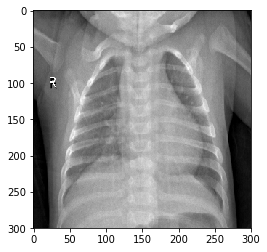

In [10]:
plt.imshow(train_X[0], cmap="gray")
print(train_X[0])


<h2 style="color:Tomato";> The vector shown just above this Image is it's colors for each pixel, I know that in grayscale and RGB the numbers can range from 0-255, thats a large range for the convolution neural network to work on effectively. So I'll normalize the images pixel colors, This is done through a module so I don't break it, but what it does is it will make all values for each pixel in each image between range between 0 and 1, It does this by multiplying by float(1/255)</h2>

In [11]:
#Checking to see type conversion with tensorflow
#print(type(train_X))

In [12]:
train_X = tf.keras.utils.normalize(train_X, axis=1)
test_X = tf.keras.utils.normalize(test_X, axis=1)
val_X = tf.keras.utils.normalize(val_X, axis=1)
print("done")


done


[[0.07504798 0.07123146 0.06700951 ... 0.00968842 0.01359387 0.01681265]
 [0.07504798 0.07123146 0.06700951 ... 0.0067819  0.01165189 0.01483469]
 [0.07599795 0.07310598 0.07166295 ... 0.00484421 0.00873892 0.01285673]
 ...
 [0.01234967 0.01405884 0.014891   ... 0.02228337 0.0213618  0.01780163]
 [0.01139969 0.01312159 0.01302963 ... 0.02228337 0.02233279 0.01582367]
 [0.01424962 0.01218433 0.01302963 ... 0.02034569 0.02039081 0.01384571]]
<class 'numpy.ndarray'>


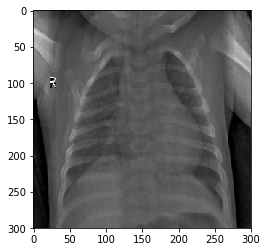

In [13]:
plt.imshow(train_X[0], cmap="gray")
print(train_X[0])
print(type(train_X))

<h3 style="color:Tomato;">
This is the difference with the color scaling, nothing to dramatic, it is visibly a little darker, but it helps signifigantly with the neural networks learning, This also automatically converts the list of numbers into a numpy array. I'll have to manually do that to the classification (list of classification values,aka the ones labaled train_y, test_y, etc.)<br><br> I also need to add a 4th dimension that is a a mandatory thing that tensorflow needs to read, its not actually used in the 2 dimensional convolutional layers.</h3> 

In [14]:
print(type(train_y))


train_y = np.array(train_y)

test_y = np.array(test_y)

val_y= np.array(val_y)

print(type(train_y))
print("Done")


<class 'list'>
<class 'numpy.ndarray'>
Done


In [15]:
# -1 is the catch all taht creates the fourth parameter that the neural network needs, the middle two are the image Length and width
# 1 is the color mapping , we are grayscale so 1 color pallete is necesary, RGB would be 3.
train_X = np.array(train_X).reshape(-1, imageSize, imageSize, 1)
test_X = np.array(test_X).reshape(-1, imageSize, imageSize, 1)
val_X = np.array(val_X).reshape(-1, imageSize, imageSize, 1)
print("Done!")

Done!


In [16]:
#Checking to ensure normalization worked on all data partitions (it did)
#print("Train")
#print(train_X[0])
#print(len(train_X))
#print("Test")
#test_X
#len(test_X)
#print("Val")
#val_X[0]

In [17]:
train_X.shape

(5216, 300, 300, 1)

In [18]:
print(len(train_y))

5216


This is the part where I create the actual Convolutional Neural Network. I'll add some links to things that can help explain certain parts of it that I might not explain well at all.

The optimizer used in this CNN is Stochastic Gradient descent, it's got a learning rate set to 0.01 and a momentum of 0.9, I could lower the learning rate more if there was a lot of volatiliy in the learning pattern of the model, but that was not the case in my tests earlier.

I started off initially using regular Convolutional 2D Layers, using 64 filters (64 inputs) and a (3,3) filter size. Heres a link that gives a quick intuitive understanding of this layer type. [Intuitively understanding Convolutions for deep learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

Another Layer type used is the MaxPooling2D Layer, this is how I do dimensionality reduction on the images, I gradually make tem smaller by putting these in just before I change the filter size for the incoming layers. Maxpooling2D literally takes the maximum number that is given from the prevous ConvLayer, the size is indicated by its pool_size, which is always 2,2 for me, so for each calculations that a Convlayer does, 1 in 4 of those will be chosen to continue on.
[Great Example of Maxpooling Layer](https://github.com/mbadry1/DeepLearning.ai-Summary/tree/master/4-%20Convolutional%20Neural%20Networks#pooling-layers)


Another "layer" I end up using most frequently is a seperableConv2d Layer, The reasons for this are honestly just from reading things. And seeing the Neural Network Architechtures that have been showing up over recent years. Here is an article on it
[10 CNN Architechtures](https://towardsdatascience.com/illustrated-10-cnn-architectures-95d78ace614d)
[Types of Convolutions do CTRL+F "seperable"](https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d)

The last type of layer I use is a Dense Layer, These layers are done after flattening the data into 1 dimension.
Dense Layers are very similar to Conv2D Layers., and the final one uses 1 filter, it is the "decision" of the classification.

Activations are always Rectified Linear Unit, it is very computationally efficient, EXCEPT for the final Dense layer this layer uses the sigmoid function, we want the value to be between 0 and 1, since I am using binary cross entropy (The result is 1 of 2 answers, 0 or 1 in our case).
[Loos functions and Optimization Functions](http://cs231n.github.io/neural-networks-1/#actfun)

I do use BatchNormalization is used between most layers to help with overfitting that was way more prevalant when I first started(It's still a problem, but adding more layers like dropout or even more seperable layers was cuasing the memory I'm allocated on kaggle to exceed the given amount, resetting the Notebook.

I was able to do 10 epochs fine and VERY fast with the use of Kaggles, GPU accelerator.

In [19]:
# Model type is sequential, standard here it seems.
model = Sequential()
# Optimizer would be 'adam' or any of the other default given ones
# but using the actual SGD Stochastic Gradient Descent optimizer allows us to tweak learning rate and momentum.
opt = SGD(lr=0.01, momentum=0.9)


# Initial stride larger and k_size larger too to get "larger" understanding of image
# Starting with conv2d and transitioning to separableconv2, the computations are the same(?) but the separable is far more efficient
# https://towardsdatascience.com/types-of-convolutions-in-deep-learning-717013397f4d
# Continue using BatchNorm as network gets deeper. Used maxpooling2D as my dimensionality reduction method.

model.add(Conv2D(64, (3,3), activation='relu', padding='same',input_shape=(imageSize,imageSize,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

#Begin Smaller Sep.Conv2D Rectified Linear Unit activation throughout until the end
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(SeparableConv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(SeparableConv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(SeparableConv2D(512, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
# create 1D array and some fully connected layers.
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3,))
# Finally conluding on 1 of 2 possible outputs we get the classification, using sigmoid activation.
# See http://cs231n.github.io/neural-networks-1/#actfun "Common activation functions"
model.add(Dense(1, activation='sigmoid'))
    

'''
Finally finishing this up with a Dense layer to give us our result of 0 or 1.
In order to use a dense layer the data must be 1d so we use a Flatten layer to "flatten" the images.
'''
#The flatten into a full connected Layer and then finally, the classification of our image.



model.compile(loss="binary_crossentropy", optimizer=opt, metrics=['accuracy'])



model.fit(train_X, train_y, batch_size=30, epochs=10, validation_data=(val_X, val_y))


Train on 5216 samples, validate on 16 samples
Epoch 1/10
5216/5216 [==============================] - 98s 19ms/sample - loss: 0.5798 - accuracy: 0.7391 - val_loss: 0.7984 - val_accuracy: 0.5000
Epoch 2/10
5216/5216 [==============================] - 91s 17ms/sample - loss: 0.5714 - accuracy: 0.7429 - val_loss: 0.8104 - val_accuracy: 0.5000
Epoch 3/10
5216/5216 [==============================] - 91s 17ms/sample - loss: 0.4571 - accuracy: 0.7899 - val_loss: 1.0918 - val_accuracy: 0.5000
Epoch 4/10
5216/5216 [==============================] - 91s 17ms/sample - loss: 0.1934 - accuracy: 0.9176 - val_loss: 0.6336 - val_accuracy: 0.6875
Epoch 5/10
5216/5216 [==============================] - 91s 17ms/sample - loss: 0.1527 - accuracy: 0.9400 - val_loss: 0.5152 - val_accuracy: 0.8750
Epoch 6/10
5216/5216 [==============================] - 91s 17ms/sample - loss: 0.1332 - accuracy: 0.9477 - val_loss: 0.7295 - val_accuracy: 0.5625
Epoch 7/10
5216/5216 [==============================] - 91s 17ms/s

Finally, We can predict the test set, using the model we built we can see what our Neural Network will predict given just some images.

In [20]:
prediction = model.evaluate(test_X, test_y)


624/624 [==============================] - 2s 4ms/sample - loss: 0.3973 - accuracy: 0.8317


In [21]:
print()